# Bird Classification Project
---

## Load and Explore Data

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image

In [3]:
# Explore folder

data_dir = '../Data'

os.listdir(data_dir)

['images to predict', 'test', 'train', 'valid']

In [5]:
test_dir = '../Data/test'
train_dir = '../Data/train'
valid_dir = '../Data/valid'
predict_dir = '../Data/images to predict'

In [7]:
os.listdir(train_dir)

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

### Model Building

In [9]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras import models

In [11]:
# Load VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False)

In [13]:
# Specify new input shape for images and update base_model
new_input = keras.Input(shape=(224, 224, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=new_input)
base_model.trainable = False

In [15]:
flatten_layer = Flatten()
prediction_layer = Dense(20, activation='softmax')

In [17]:
model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │       501,780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,216,468 (58.05 MB)

 Trainable params: 501,780 (1.91 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3208 images belonging to 20 classes.


In [62]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 100 images belonging to 20 classes.


In [27]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(valid_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 100 images belonging to 20 classes.


### Model Training

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

history = model.fit(train_set, epochs=3, validation_data=val_set, callbacks=[early_stop])

C:\Users\egagn\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3


C:\Users\egagn\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_19']. Received: the structure of inputs=*
  warnings.warn(


101/101 ━━━━━━━━━━━━━━━━━━━━ 2639s 26s/step - accuracy: 0.4118 - loss: 2.2672 - val_accuracy: 0.8100 - val_loss: 0.6269
Epoch 2/3
101/101 ━━━━━━━━━━━━━━━━━━━━ 2948s 29s/step - accuracy: 0.8331 - loss: 0.5274 - val_accuracy: 0.9100 - val_loss: 0.3645
Epoch 3/3
101/101 ━━━━━━━━━━━━━━━━━━━━ 2872s 28s/step - accuracy: 0.9117 - loss: 0.2731 - val_accuracy: 0.9300 - val_loss: 0.3297


In [ ]:
# model.save('model.h5')

In [ ]:
# loaded_model = load_model('model.h5')

### Model Evaluation

In [31]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.595387,1.468658,0.81,0.626892
1,0.834476,0.515366,0.91,0.364481
2,0.912718,0.270585,0.93,0.329701


<Axes: >

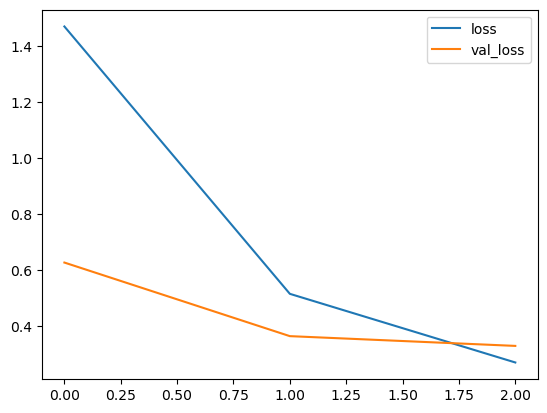

In [33]:
metrics[['loss','val_loss']].plot()

<Axes: >

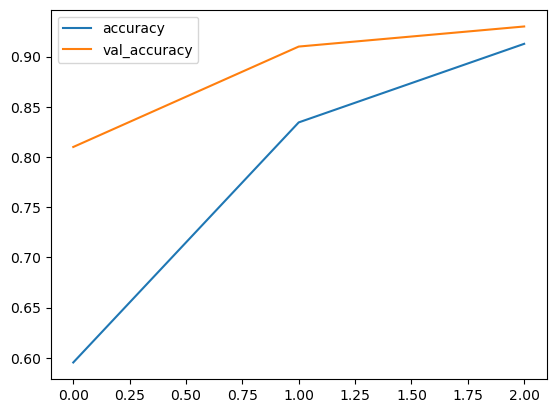

In [34]:
metrics[['accuracy','val_accuracy']].plot()

In [37]:
# Print accuracy and loss for Validation set

score = model.evaluate(val_set, verbose=1)
print("validation loss:", score[0])
print("validation accuracy:", score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 94s 23s/step - accuracy: 0.9355 - loss: 0.3450
validation loss: 0.32970118522644043
validation accuracy: 0.9300000071525574


In [66]:
model.evaluate(test_set, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 18s/step - accuracy: 0.9013 - loss: 0.2560


[0.22778552770614624, 0.9200000166893005]

In [67]:
test_predicts = model.predict(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 93s 22s/step


In [70]:
test_set.reset()
true_preds = []
for i in range(len(test_set)):
    true_preds.extend(np.argmax(test_set[i][1], axis=1))

true_preds = np.array(true_preds)

In [ ]:
# true_preds

In [72]:
# Convert predictions to class labels
test_predict_classes = np.argmax(test_predicts, axis=1)

In [ ]:
# test_predict_classes

In [74]:
from sklearn.metrics import classification_report

print(classification_report(true_preds, test_predict_classes, 
                            target_names=test_set.class_indices.keys()))

                            precision    recall  f1-score   support

           ABBOTTS BABBLER       1.00      0.80      0.89         5
             ABBOTTS BOOBY       1.00      0.60      0.75         5
ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
     AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
    AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
         AFRICAN FIREFINCH       0.67      0.80      0.73         5
    AFRICAN OYSTER CATCHER       1.00      0.80      0.89         5
     AFRICAN PIED HORNBILL       1.00      0.60      0.75         5
       AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                 ALBATROSS       0.83      1.00      0.91         5
            ALBERTS TOWHEE       0.83      1.00      0.91         5
      ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
             ALPINE CHOUGH       0.80      0.80      0.80         5
     ALTAMIRA YELLOWTHROAT       1.00      1.00

In [76]:
model.save('pred_model.h5')

In [78]:
os.listdir(predict_dir)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg']

In [108]:
os.listdir(predict_dir)[1]

'2.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'AFRICAN CROWNED CRANE'

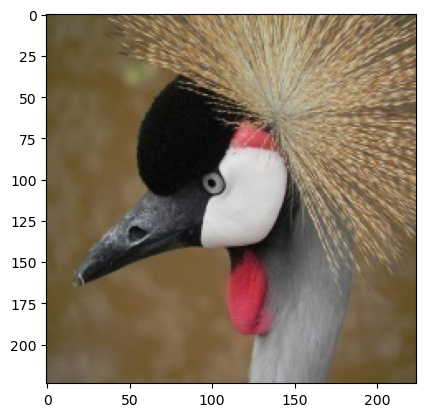

In [120]:
from keras.models import load_model

# Load the saved model
model1 = load_model('pred_model.h5',compile=False)

# Get class labels from the training set
lab = train_set.class_indices
# Invert the dictionary to map class indices to labels
lab={k:v for v,k in lab.items()}

# Function to predict the class label of an input image
def output(location):
    # Load and preprocess the input image
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    # Predict the class probabilities for the input image
    answer=model1.predict(img)
    # Get the index of the predicted class with the highest probability
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    # Map the predicted class index to the corresponding label
    res = lab[y]
    return res

# Example usage of the output function with an image path
img= '../Data/images to predict/1.jpg'
pic=load_img('../Data/images to predict/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [100]:
os.listdir(test_dir)

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

In [116]:
os.listdir(test_dir+'/ABBOTTS BABBLER')[1]

'2.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'ABBOTTS BABBLER'

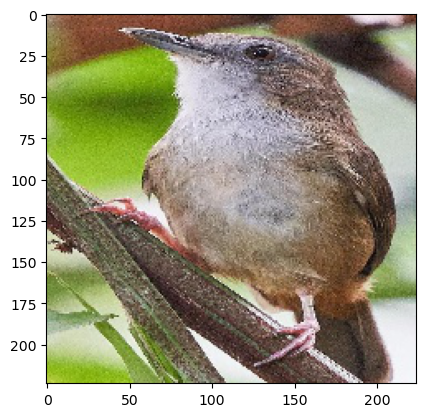

In [118]:
img= '../Data/test/ABBOTTS BABBLER/2.jpg'
pic=load_img('../Data/test/ABBOTTS BABBLER/2.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)